# Анализ маркетинговых вложений в приложение Procrastinate Pro+

### Введение

В моем распоряжении данные о приложении Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо проанализировать данные и дать рекомендации отделу маркетинга:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/Users/janna/Downloads/visits_info_short.csv')
    orders = pd.read_csv('/Users/janna/Downloads/orders_info_short.csv')
    costs = pd.read_csv('/Users/janna/Downloads/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Просмотр данных

In [3]:
display(visits)
display(orders)
display(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Информация о данных

In [4]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

#### Изменение названий столбцов

In [5]:
#привожу все названия стобцов к строчным буквам
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

#меняю пробелы на нижнее подчеркивание
visits = visits.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders=orders.rename(columns = {'user id':'user_id','event dt':'event_dt'})
                                

#### Изменение типов данных

In [6]:
#меняю формат у всех столбов, содержащих дату
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Проверка на дубликаты

In [7]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


#### Проверка на пропуски

In [8]:
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
session end      0
dtype: int64
user_id     0
event_dt    0
revenue     0
dtype: int64
dt         0
channel    0
costs      0
dtype: int64


Дубликатов и пропусков нет

Итого, у нас есть три таблицы с данными о визитах на 309901 строк, заказах на 40212 строк и рекламных расходов на 1800 строк.
В данных нет пропусков и явных дублей. Формат данных и названия столбцов преобразованы в удобные для анализа.

### Добавление функций

#### Функция для создания профилей пользователей

In [9]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 


#### Функция для для подсчёта Retention Rate

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта конверсии

In [11]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчёта LTV

In [12]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для визуализации сглаживания данных

In [13]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для построения графика Retention Rate

In [14]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для построения графика конверсии

In [15]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Профили пользователей

In [17]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(10)) 


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [18]:
#Максимальная и минимальная даты привлечения пользователей по каждому каналу
costs.groupby('channel').agg({'dt': ['min','max']})


dt            
                           min         max
channel                                   
AdNonSense          2019-05-01  2019-10-27
FaceBoom            2019-05-01  2019-10-27
LeapBob             2019-05-01  2019-10-27
MediaTornado        2019-05-01  2019-10-27
OppleCreativeMedia  2019-05-01  2019-10-27
RocketSuperAds      2019-05-01  2019-10-27
TipTop              2019-05-01  2019-10-27
WahooNetBanner      2019-05-01  2019-10-27
YRabbit             2019-05-01  2019-10-27
lambdaMediaAds      2019-05-01  2019-10-27

Пользователи привлекались в период с 1 мая 2019 года по 27 октября 2019 года.

In [19]:
profiles.groupby('channel').agg({'dt': ['min','max']})


dt            
                           min         max
channel                                   
AdNonSense          2019-05-01  2019-10-27
FaceBoom            2019-05-01  2019-10-27
LeapBob             2019-05-01  2019-10-27
MediaTornado        2019-05-01  2019-10-27
OppleCreativeMedia  2019-05-01  2019-10-27
RocketSuperAds      2019-05-01  2019-10-27
TipTop              2019-05-01  2019-10-27
WahooNetBanner      2019-05-01  2019-10-27
YRabbit             2019-05-01  2019-10-27
lambdaMediaAds      2019-05-01  2019-10-27
organic             2019-05-01  2019-10-27

#### Распределение по странам

In [20]:
region_table = (profiles.pivot_table(index = 'region', columns = 'payer', values = 'user_id', aggfunc = 'count')
                .rename(columns={False: 'no_payer', True:'payer'})
                .sort_values(by ='payer', ascending = False)
               ) #сводная с распределением плательщиков и неплательщиков по странам
region_table['all'] = region_table['payer']+region_table['no_payer'] #добавление общего количества пользователей
region_table['part'] = region_table['payer']/region_table['all']*100 #определение доли плательщиков от общего количество
display(region_table)



payer,no_payer,payer,all,part
region,,,,
United States,93100,6902,100002,6.901862
UK,16875,700,17575,3.982930
France,16787,663,17450,3.799427
Germany,14365,616,14981,4.111875


Самое большое количество платящих пользователей в США. Так же в США самое большое количество пользователей в целом и наибольшая доля платящих пользователей.

#### Использование устройств

payer,no_payer,payer,all,part
device,,,,
iPhone,51097,3382,54479,6.207897
Android,32982,2050,35032,5.851793
Mac,28130,1912,30042,6.364423
PC,28918,1537,30455,5.046790


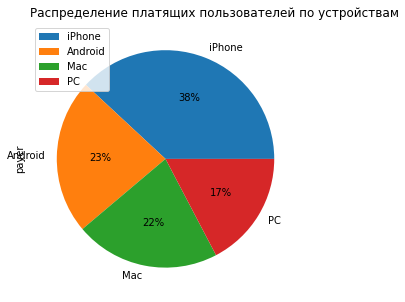

In [21]:
device_table = (profiles.pivot_table(index = 'device', columns = 'payer', values = 'user_id', aggfunc = 'count')
                .rename(columns={False: 'no_payer', True:'payer'})
                .sort_values(by ='payer', ascending = False)
               )
device_table['all'] = device_table['payer']+device_table['no_payer']
device_table['part'] = device_table['payer']/device_table['all']*100
display(device_table)
device_table['payer'].plot(kind='pie', subplots=True, figsize=(5,5), autopct='%1.0f%%')
plt.title(label= "Распределение платящих пользователей по устройствам", loc = 'left') 
plt.legend(loc = 'upper left')
plt.show()

Самое большое количество платящих пользователей приходится на держателей iPhone.<br> 
При этом доля плательщиков больше среди пользователей Mac

#### Каналы привлечения

In [22]:
channel_table = (profiles.pivot_table(index = 'channel', columns = 'payer', values = 'user_id', aggfunc = 'count')
                 .rename(columns={False: 'no_payer', True:'payer'})
                 .sort_values(by ='payer', ascending = False)
                )
channel_table['all'] = channel_table['payer']+channel_table['no_payer']
channel_table['part'] = channel_table['payer']/channel_table['all']
display(channel_table.sort_values(by ='part', ascending = False).style.format({('part'): '{:.2%}'}))

payer,no_payer,payer,all,part
channel,,,,
FaceBoom,25587,3557,29144,12.20%
AdNonSense,3440,440,3880,11.34%
lambdaMediaAds,1924,225,2149,10.47%
TipTop,17683,1878,19561,9.60%
RocketSuperAds,4096,352,4448,7.91%
WahooNetBanner,8100,453,8553,5.30%
YRabbit,4147,165,4312,3.83%
MediaTornado,4208,156,4364,3.57%
LeapBob,8291,262,8553,3.06%


Больше всего по абсолютному количеству пользователей и по количеству платящих пользователей пришло с помощью FaceBoom. Также через компании AdNonSense, lambdaMediaAds, TipTop приходит большое количество платящих пользотелей 10-12%

In [24]:
#смотрю, в каких странах используются источники
profiles.pivot_table(index = 'region', columns = 'channel', values = 'user_id', aggfunc = 'count').T

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,NaN
FaceBoom,NaN,NaN,NaN,29144.0
LeapBob,2988.0,2519.0,3046.0,NaN
MediaTornado,NaN,NaN,NaN,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
RocketSuperAds,NaN,NaN,NaN,4448.0
TipTop,NaN,NaN,NaN,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,NaN
YRabbit,NaN,NaN,NaN,4312.0


Получается, что для Европейских стран каналами привлечения являются AdNonSense, LeapBob, OppleCreativeMedia , WahooNetBanner и lambdaMediaAds. <br>

А для США FaceBoom, MediaTornado, RocketSuperAds, TipTop и YRabbit.<br>

При этом, среди Европейских компаний нет явных лидеров по затратам и количеству привлеченных клиентов, а в США заментно выделяются FaceBoom и TipTop.

### Маркетинг

#### Общие затраты на маркетинг

In [25]:
print('Общая сумма затрат на маркетинг', round(costs['costs'].sum(),2))

Общая сумма затрат на маркетинг 105497.3


#### Распределение по рекламным источникам

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

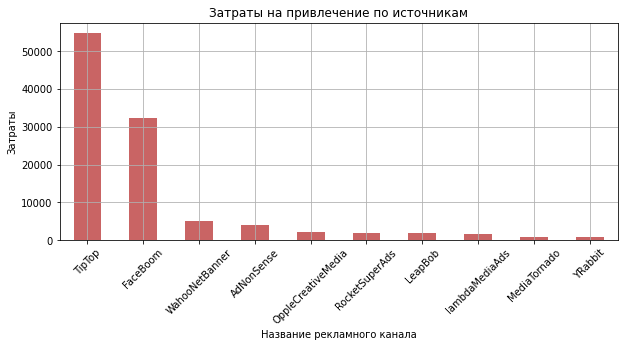

In [26]:
channel_costs = costs.groupby('channel')['costs'].sum().sort_values(ascending = False)
display(channel_costs)
channel_costs.plot(kind = 'bar',color='firebrick',grid = True, alpha=.7, linewidth=20, figsize = (10,4))         
plt.xlabel('Название рекламного канала')
plt.ylabel('Затраты')
plt.xticks(rotation= 45)
plt.title('Затраты на привлечение по источникам')
plt.show()

По таблице и графику видно, что большая часть бюджета уходит на каналы TipTop и FaceBoom. На них приходится больше 80% общего бюджета. Затраты на остальные источники привлечения примерно одинаковые.

In [27]:
channel_costs = costs.pivot_table(index = 'channel', values = 'costs', aggfunc = 'sum')
channel_costs['part'] = channel_costs['costs']/(channel_costs['costs'].sum())*100
display(channel_costs.sort_values(by='part', ascending = False))

,costs,part
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


#### Визуализация динамики расходов

/tmp/ipykernel_48/3367817487.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  costs['week'] = pd.DatetimeIndex(costs['dt']).week


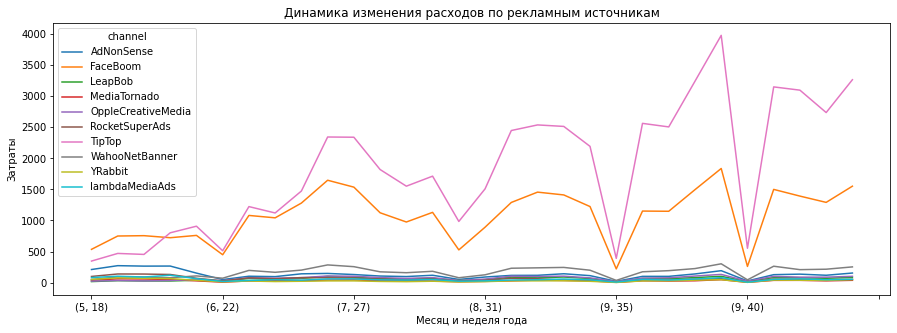

In [28]:
costs['month'] = pd.DatetimeIndex(costs['dt']).month
costs['week'] = pd.DatetimeIndex(costs['dt']).week

spending_dynamics = costs.pivot_table(index = 'channel', columns = ['month','week'], values = 'costs', aggfunc = 'sum')
spending_dynamics.T.plot(figsize = (15,5))
plt.xlabel('Месяц и неделя года')
plt.ylabel('Затраты')
plt.title('Динамика изменения расходов по рекламным источникам')
plt.show()

Видна общая небольшая тенденция к повышению затрат. <br>
Также есть резкие скачки в затратах в октябре, в 35 и 40 недели года - в эти недели затраты были на уровне изначальных вложений по всем рекламным источникам. Вероятно, в эти недели пользователей не привлекали.

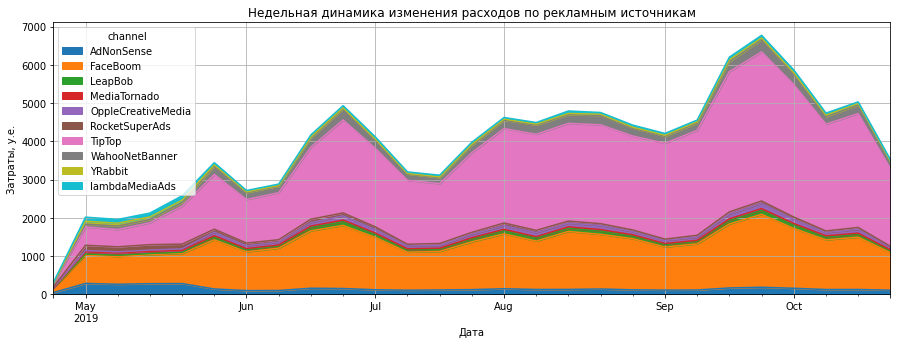

In [30]:
tmp.pivot_table(index = 'channel', columns = 'week', values = 'costs', aggfunc = 'sum').T.plot.area(figsize = (15,5))
plt.xlabel('Дата')
plt.ylabel('Затраты, у.е.')
plt.title('Недельная динамика изменения расходов по рекламным источникам')
plt.grid() 
plt.show()

#### Затраты на привлечение одного пользователя

In [31]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending = False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

При том, что канал TipTop итак самый дорогой, затраты на одного пользователя там получаются самые большие.
А общее количество пользователей и количество платящих пользователей, пришедших через этот канал меньше канала FaceBoom и меньше количества органических пользователей. 

### Окупаемость рекламы

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [33]:
profiles = profiles.query('channel != "organic"')

#### Анализ окупаемости без разбивки

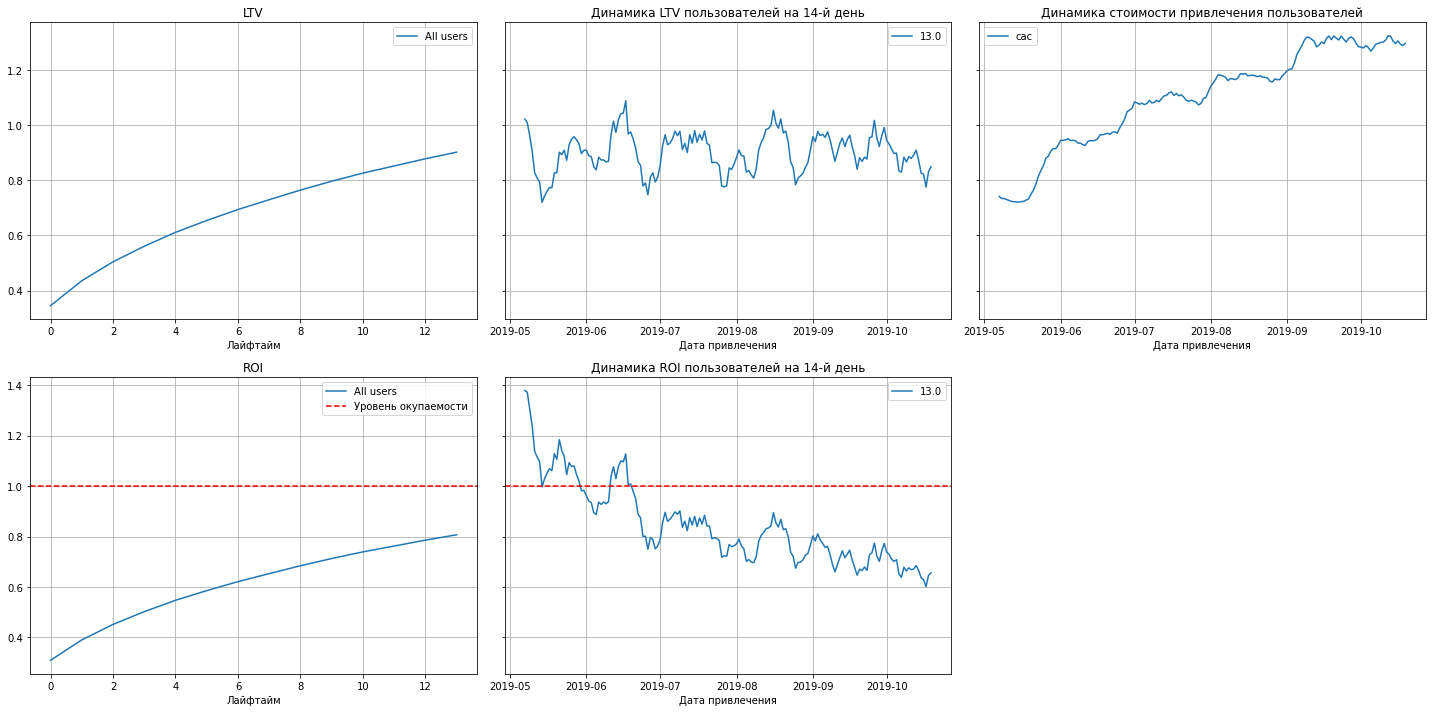

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV равномерно растет, значит, ценность клиента и средний доход с него увеличиваются
LTV в динамике достаточно стабилен, нет резких скачков
Показатель САС постоянно растет, значит, вложения в рекламу только увеличиваются
ROI не дошел до единицы - рекламные вложения не окупаются и не особо близки к этому пока. При этом по динамике ROI видно, что показатель только падает.
Соответственно, ценность клиента возрастает, но рекламные расходы возрастают гораздо быстрее, поэтому в итоге компания всё равно терпит убытки после привлечения.

####  Конверсия пользователей и ее динамика

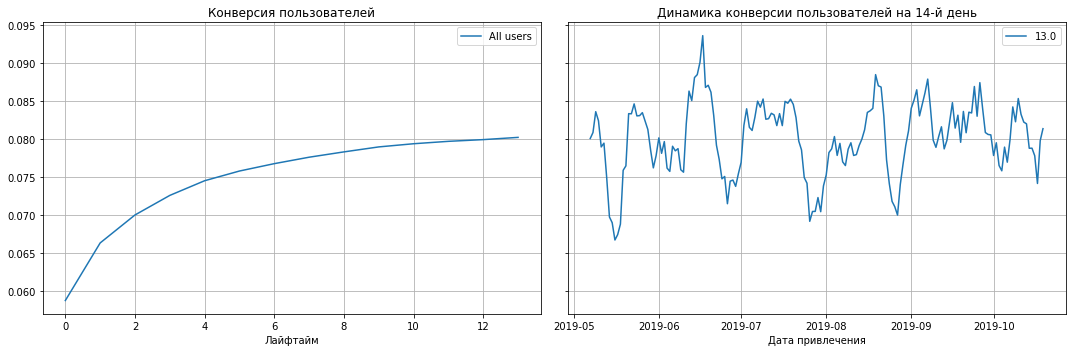

In [35]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
) 

plot_conversion(conversion, conversion_history, horizon_days) 

Общая конверсия держится примерно на уровне 7-8%, что достаточно неплохо.

####  Удержание пользователей и его динамика

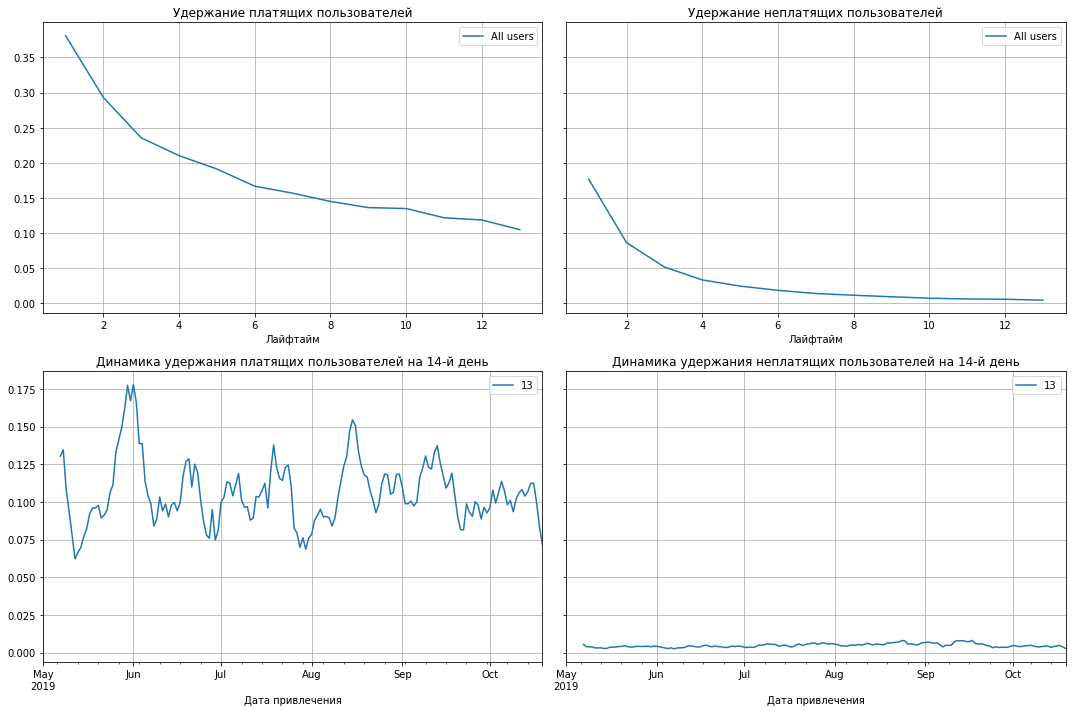

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Доля удержания для платящих пользователей выше, чем для неплатящих, но при этом оба показателя равномено закономерно снижаются. А динамика у удержания платящих, о отличие от неплатящих, сильно скачет, что может свидетельствовать о меньшем количестве привлеченных клиентов в эти периоды.

#### Oкупаемость рекламы с разбивкой по устройствам

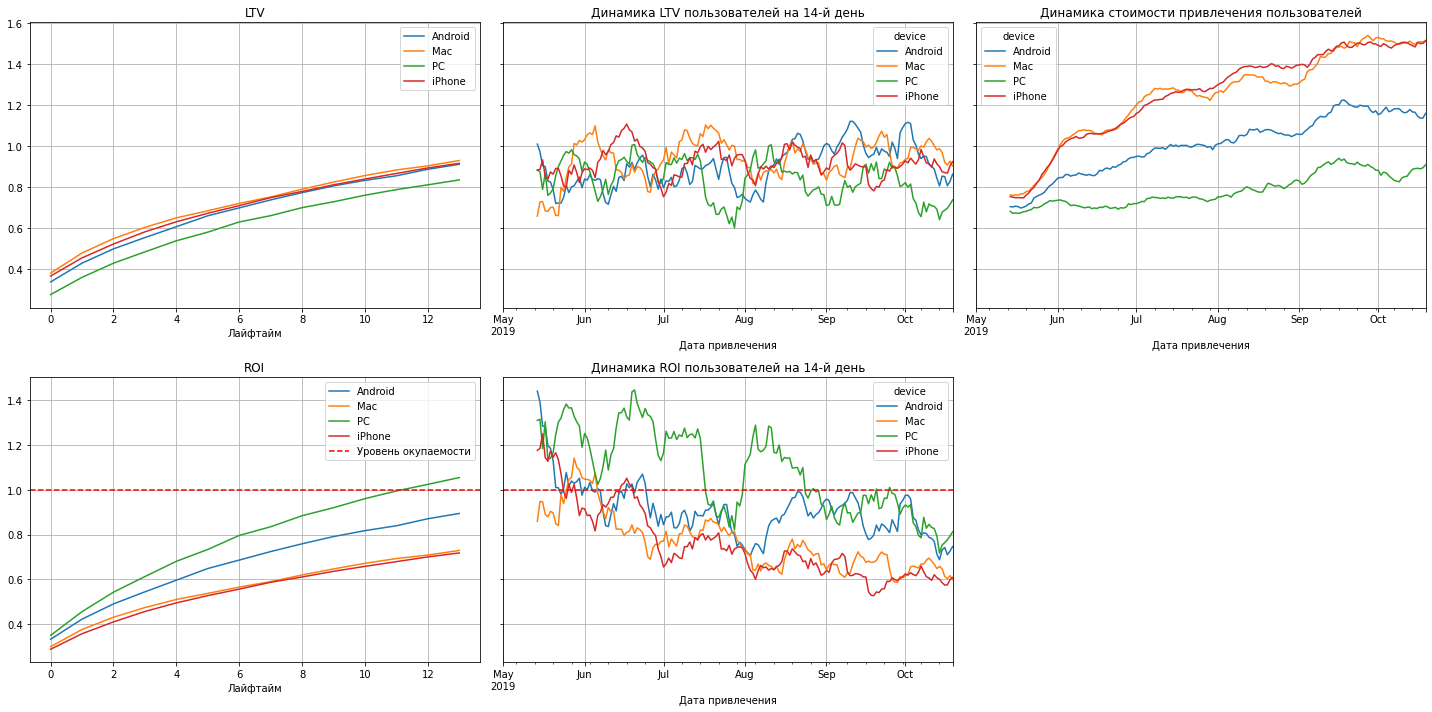

In [37]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


Стоимость привлечения на всех устройствах непрерывно растет. <br>
При этом вложения в привлечение пользователей iPhone и Mac и Android не окупаются, в отличие от PC.

#### Oкупаемость рекламы с разбивкой по странам

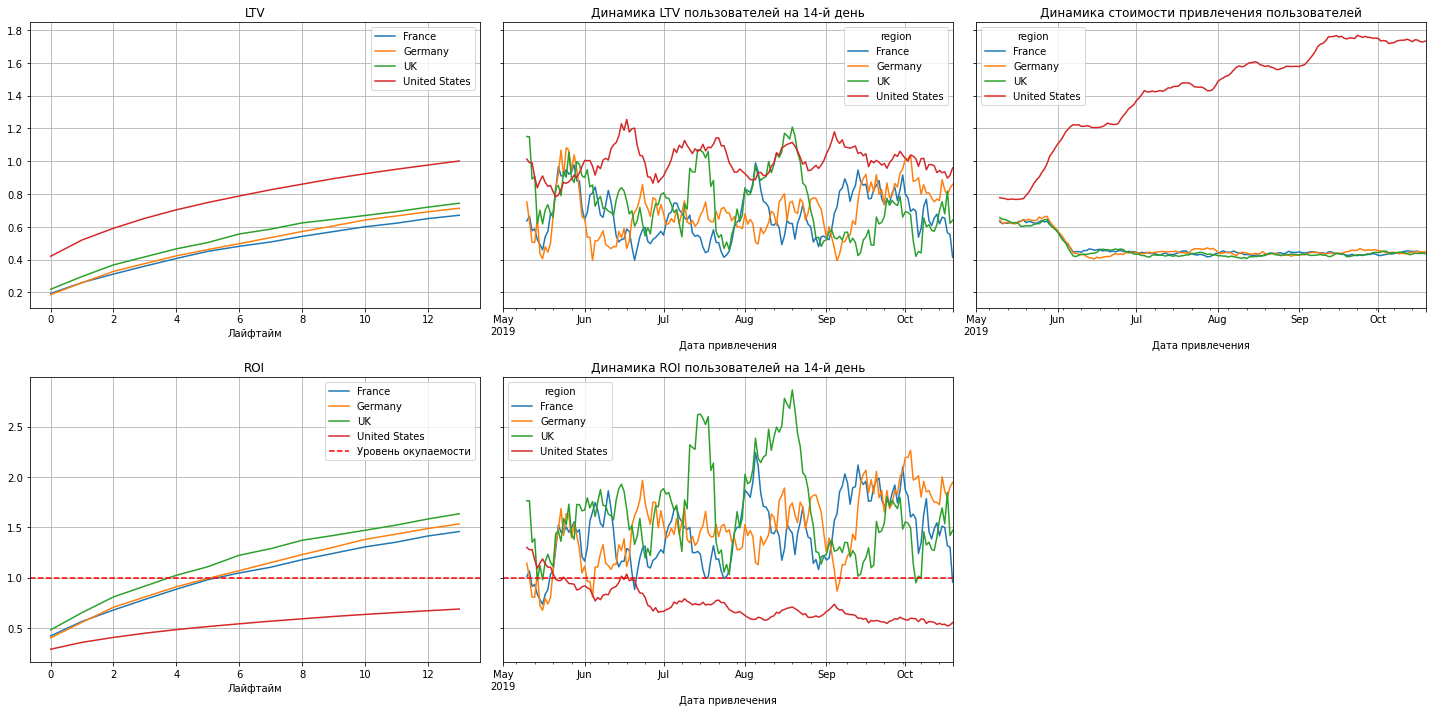

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
) 

Стоимость привлечения пользователей растет только в США, в остальных регионах она довольно стабильна. <br>
При этом только в США затраты не окупаются, в то время, как в остальных странах с этим в порядке

#### Окупаемость рекламы с разбивкой по рекламным каналам

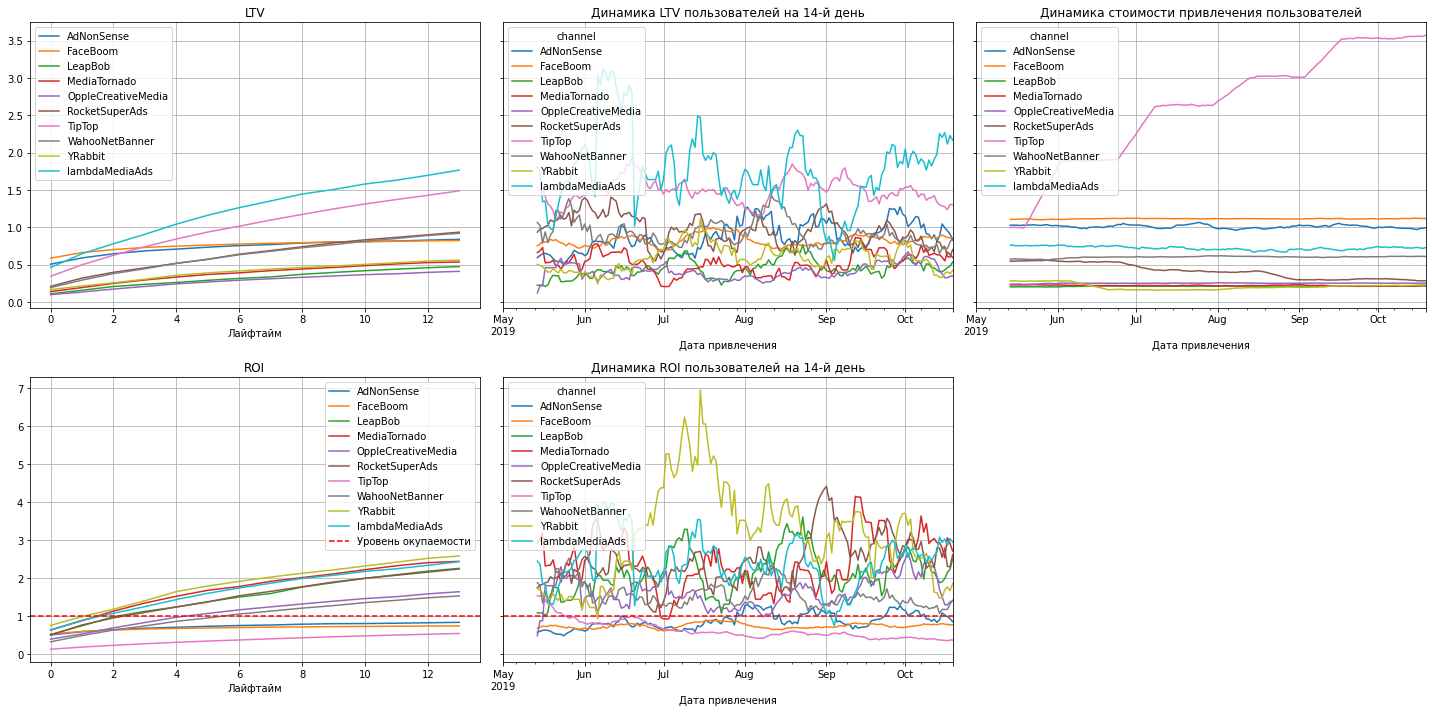

In [39]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стоимость привлечения пользователей растет только по каналу TipTop, по остальным каналам стоимость почти не меняется. 
При этом вложения в TipTop, FaceBoom, AdNonSense не окупаются. 



1. В целом реклама, направленная на привлечение пользователей, пока не окупается. <br>


2. Хуже всего окупаются пользователи устройств на iOS. <br>
Самый плохой показатель по окупаемости среди стран у США. Все остальные страны окупают расходы на себя.<br>
Самый затратный канал - TipTop. Затраты на него постоянно растут, он не окупается и приносит не самое большое количество пользователей.<br>


3. Возможные проблемы окупаемости:
- Слишком высокие затраты на привлечение, несоразмерные потенциальной выручке, которую могут принести пользователи.<br>
- Рекламный канал, в который вкладывается много денег, а пользователей через него приходит мало. <br>
- Слишком большой бюджет для страны, в которой низкий спрос на продукт<br>
- Неверное определение целевой аудитории, на которую ориентирована реклама

#### Исследование источника FaceBoom

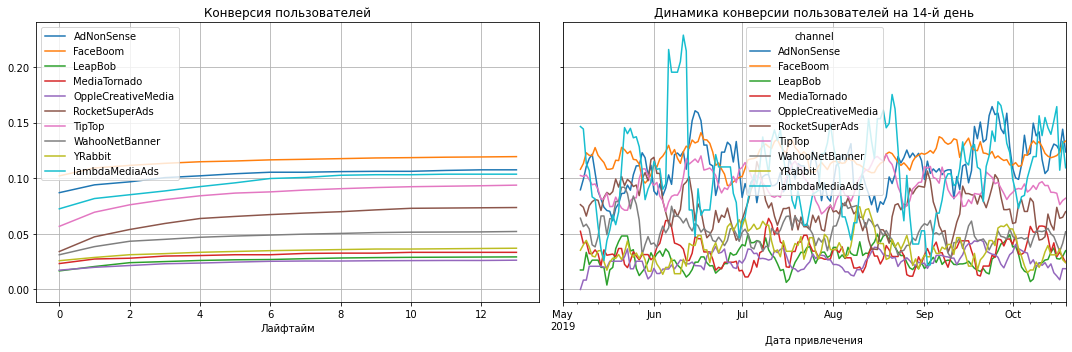

In [40]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions = ['channel']
) 

plot_conversion(conversion, conversion_history, horizon_days) 

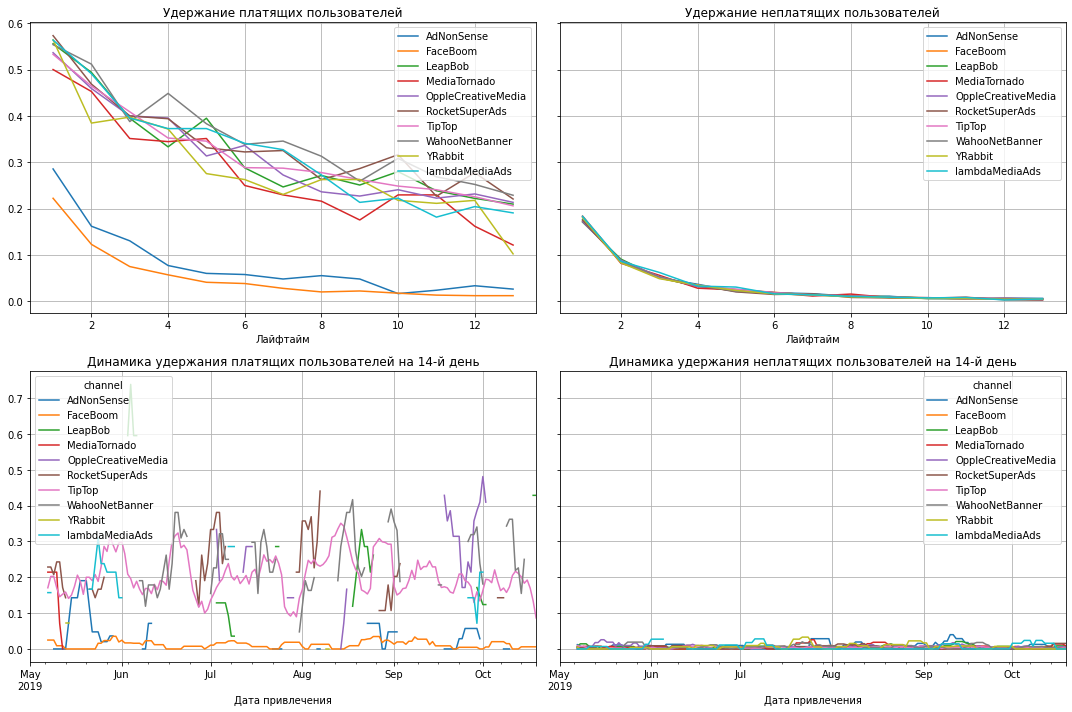

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По затратам рекламного бюджета сильно выделяются две компании FaceBoom и TipTop. 
Затраты на TipTop постоянно растут, поэтому затраты объяснимы, но у FaceBoom уровень затрат стабильный.
По конверсии у FaceBoom самый высокий показатель, но по удержанию показатель стабильно самый низкий. Значит, пользователи, которых приносит компании FaceBoom, в большинстве случаев заходят только один раз и больше не возвращаются. То есть компании постоянно приходится платить за новых клиентов, которые не будут повышать LTV, то есть общую ценность клиента.

### Итоговый вывод

Рекламная компания не окупается. При этом конверсия держится на хорошем показателе 8%.
Общие затраты на рекламу растут. <br>
Одна из компаний, занимающихся привлечением - TipTop слишком затратна для компании. Относительно количества приведенных пользователей, у этой компании самая дорогая цена. При этом затраты именно на эту компанию постоянно увеличиваются, в то время, как затраты на остальные остаются примерно на одном уровне.<br>

В разрезе по странам, проблема с окупаемостью только в США. Следовательно, стоит обратить внимание на затраты на привлечение клиентов этого региона.<br>

Не окупаются затраты на привлечение пользователей iPhone, Mac и Android. При этом эти пользователи чаще остальных конвертируются в покупателей.<br>
Всего есть три рекламных компании, затраты по которым не окупаются - TipTop, FaceBoom, AdNonSense	<br>


<b>Рекомендации для отдела маркетинга:<b>
    
Чтобы не терпеть убытки, можно отказаться от услуг компании TipTop по привлечению клиентов.
В таком случае компания может потерять около 13% от всех привлеченных пользователей, но при этом сэкономить порядка 50% всего рекламного бюджета.<br>

Стоит проверить клиентов, приходящих через канал FaceBoom. Через него приходит 19% всех пользователей, из которых 12% становятся плательщиками. Но клиенты, которые приходят через этот канал, не удерживаются и пропадают после первого посещения. Поэтому по результату затраты на этот рекламный источник не увеличиваются, но и стабильно не окупаются. Возможно, через него привлекается неподходящая целевая аудитория или еще какие-либо причины. <br>

В разбивке по устройствам видно, что затраты окупаются только для пользователей PC. Вероятно, стоит проверить удобство использования и оплаты на мобильных устройствах и маках. <br>

Также для рынка США стоит обратить внимание на каналы MediaTornado и YRabbit. Вложения в них хорошо окупаются, а из привлеченных клиентов 3,5% - 3,8% становятся плательщиками. Вероятно, следует вложить больше ресурсов в привлечение по этим каналам из сэкономленных на TipTop, так как рынок США самый крупный для компании<br>

Стоит обратить внимание на рынок Европейских стран. Сейчас он меньше, но привлечение пользователей от туда хорошо окупается, стоимость привлечения не скачет. Выделяется канал lambdaMediaAds, хорошо окупается, а пользователи из него конвертируются в покупателей в 10% случаев.
